# 감자 질병 모델학습

In [1]:
import os
import numpy as np
import splitfolders
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras.callbacks import EarlyStopping
from keras import datasets, layers, models
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_dir = './potato_data/train/'
test_dir = './potato_data/test/'
val_dir = './potato_data/val/'

In [16]:
splitfolders.ratio(r'C:\Users\LIM\Downloads\potato_disease\Training', './potato_data', seed=1337, ratio=(0.7, 0.2, 0.1))

Copying files: 3251 files [00:22, 143.94 files/s]


# 파일 정리

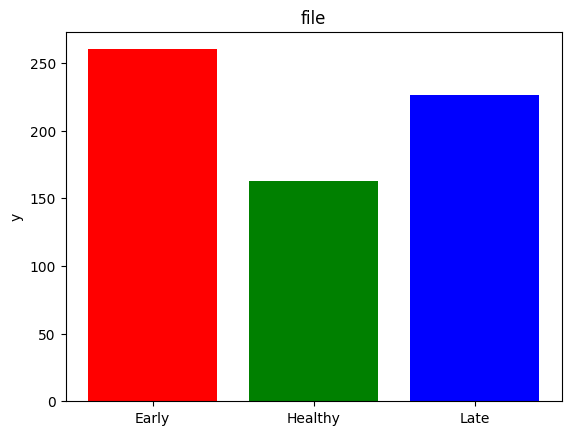

In [38]:
file_list = os.listdir('./potato_data/test/Early_Blight/')
file_list2 = os.listdir('./potato_data/test/Healthy/')
file_list3 = os.listdir('./potato_data/test/Late_Blight/')


blight = len(file_list)
healthy = len(file_list2)
Late = len(file_list3)

name = ['Early', 'Healthy', 'Late']
files = [blight, healthy, Late]

plt.bar(name, files, color = ['red', 'green', 'blue'])
plt.ylabel('y')
plt.title('file')
plt.show()

In [39]:
len(file_list), len(file_list2), len(file_list3)

(260, 163, 226)

In [40]:
for i in range(97):
    os.remove('./potato_data/test/Early_Blight/' + file_list[i])

for i in range(63):
    os.remove('./potato_data/test/Late_Blight/' + file_list3[i])

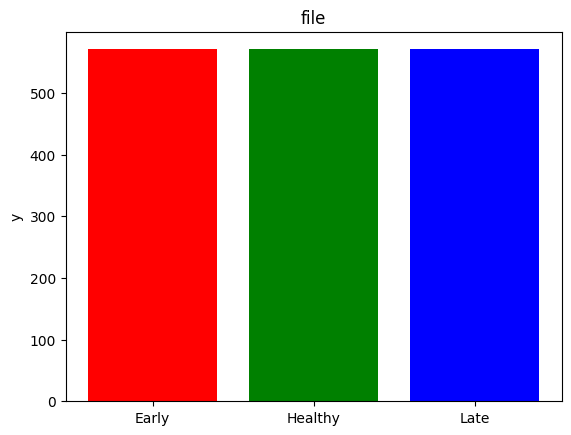

In [43]:
file_list = os.listdir('./potato_data/train/Early_Blight/')
file_list2 = os.listdir('./potato_data/train/Healthy/')
file_list3 = os.listdir('./potato_data/train/Late_Blight/')

blight = len(file_list)
healthy = len(file_list2)
Late = len(file_list3)

name = ['Early', 'Healthy', 'Late']
files = [blight, healthy, Late]

plt.bar(name, files, color = ['red', 'green', 'blue'])
plt.ylabel('y')
plt.title('file')
plt.show()

In [53]:
num_epoch=50                 
batch_size=32                   
learning_rate=0.001               
dropout_rate=0.3        
input_shape=(256, 256, 3)               
num_class=3

# 모델 학습

In [52]:
train_dir = './potato_data/train/'
test_dir = './potato_data/test/'
val_dir = './potato_data/val/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[:2]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

test_dataset = train_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[:2]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical'
)

val_dataset = test_datagen.flow_from_directory(
    val_dir,
    target_size=(input_shape[:2]),
    color_mode='rgb',
    class_mode='categorical'
)

Found 1713 images belonging to 3 classes.
Found 489 images belonging to 3 classes.
Found 246 images belonging to 3 classes.


In [54]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
# 32 : 레이어에서 생성할 필터(또는 커널)의 개수 각 필터는 입력 이미지에서 특정 특징을 감지하는데 사용
# (3,3) : 각 필터의 크기
# activation='relu' : 활성화 함수, 음수 값을 0으로 만들어 네트워크를 비선형으로 만들어 줌
model.add(layers.MaxPooling2D(2,2))
# Maxpooling 레이어를 추가
# Maxpooling을 수행할 필터(윈도우)의 크기
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Flatten())
# 다차원의 입력을 1차원으로 평평하게 펼치는 역할
model.add(layers.Dense(64, activation='relu'))
# Fully Connected 레이어를 추가하는 부분
# 64 : 레이어에서 생성 할 뉴런의 갯수
model.add(layers.Dense(num_class, activation='softmax'))
# 출력레이어를 추가하는 부분
# num_class : 출력 레이어의 뉴런 수, 분류하고자 하는 클래스의 갯수
# softmax : 각 클래스에 대한 확률 분포를 생성, 다중 클래스 분류 문제

In [55]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights=True)
# patience : 검증 손실이 3번 연속으로 향상되지 않으면 학습 조기종료
# restore_best_weights : 조기 종료가 발생한 경우 최상의 성능을 보였을 때의 가중치로 모델을 복원할지 여부를 결정

model.compile(optimizer = tf.optimizers.Adam(learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [56]:
history = model.fit(
    train_dataset,
    epochs=num_epoch,
    callbacks=early_stopping,
    validation_data=val_dataset
)

Epoch 1/50
54/54 [==============================] - 67s 1s/step - loss: 1.0639 - acc: 0.4437 - val_loss: 0.8676 - val_acc: 0.6301
Epoch 2/50
54/54 [==============================] - 60s 1s/step - loss: 0.8739 - acc: 0.5949 - val_loss: 0.7263 - val_acc: 0.6870
Epoch 3/50
54/54 [==============================] - 58s 1s/step - loss: 0.7308 - acc: 0.6853 - val_loss: 0.6269 - val_acc: 0.7561
Epoch 4/50
54/54 [==============================] - 62s 1s/step - loss: 0.6040 - acc: 0.7542 - val_loss: 0.5163 - val_acc: 0.8049
Epoch 5/50
54/54 [==============================] - 59s 1s/step - loss: 0.5662 - acc: 0.7712 - val_loss: 0.4743 - val_acc: 0.8293
Epoch 6/50
54/54 [==============================] - 60s 1s/step - loss: 0.4125 - acc: 0.8365 - val_loss: 0.4594 - val_acc: 0.8171
Epoch 7/50
54/54 [==============================] - 55s 1s/step - loss: 0.4365 - acc: 0.8336 - val_loss: 0.5720 - val_acc: 0.7439
Epoch 8/50
54/54 [==============================] - 53s 970ms/step - loss: 0.3230 - acc: 0

# 모델 시각화

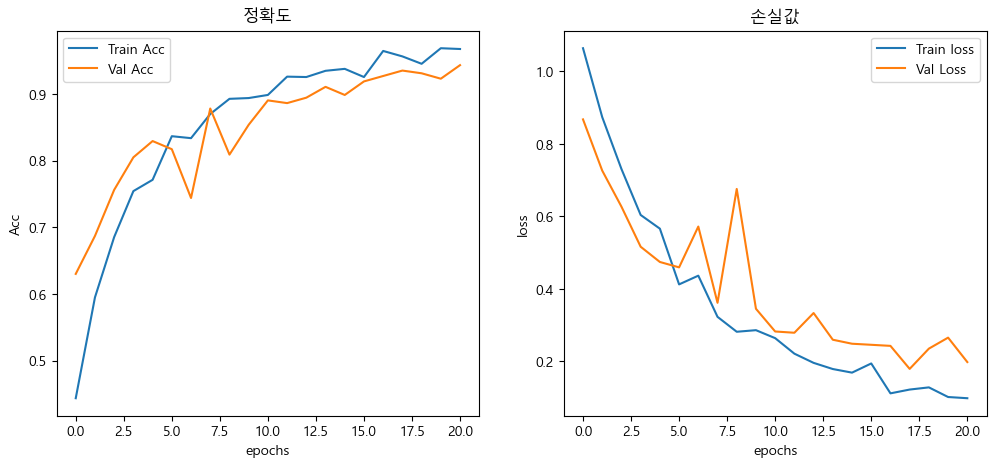

In [62]:
plt.rcParams['font.family'] = 'Malgun Gothic'

epochs = history.epoch
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label = 'Train Acc')
plt.plot(epochs, val_acc, label = 'Val Acc')
plt.title('정확도')
plt.xlabel('epochs')
plt.ylabel('Acc')
plt.legend()

train_acc = history.history['loss']
val_acc = history.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label = 'Train loss')
plt.plot(epochs, val_acc, label = 'Val Loss')
plt.title('손실값')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


# 모델 검증

In [67]:
test_data = test_datagen.flow_from_directory(
    "./potato_data/test/",
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 489 images belonging to 3 classes.


[early, heal, late] -> argmax -> 0

# 실제 값 생성

In [75]:
# y_true = []

# for filename in test_data.filenames:
#     if "Early_Blight" in filename:
#         y_true.append(0)
#     elif "Healthy" in filename:
#         y_true.append(1)
#     else:
#         y_true.append(2)

In [90]:
y_true = test_data.classes

- 데이터셋의 클래스 또는 레이블을 나타내는 속성

[
    [1.0, 0.0, 0.0], -> 0
    [0.9, 0.05, 0.05], -> 0
    ...
    ...
    [0.7, 0.2, 0.1] -> 0
] => model.predict

[0, 0, 0, .... , 2] 
[0, 0, 0, .... , 1]

# 값 검증

In [71]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = []
for pred in model.predict(test_data, verbose=0):
    y_pred.append(np.argmax(pred))

In [91]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       163
           1       0.96      0.92      0.94       163
           2       0.93      0.94      0.94       163

    accuracy                           0.93       489
   macro avg       0.93      0.93      0.93       489
weighted avg       0.93      0.93      0.93       489

